In [2]:
import numpy as np
import DataLoader
import ImageUtils

In [3]:
from skimage.filters import gaussian
from skimage.transform import rotate

In [4]:
?gaussian

In [1]:
from importlib import reload

In [6]:
reload(ImageUtils)

<module 'ImageUtils' from 'C:\\Users\\phdsa\\Documents\\deep\\CSCE636-project-2022 (1)\\starter_code\\ImageUtils.py'>

In [7]:
x_train, y_train, x_test, y_test = DataLoader.load_data('../../cifar-10-python.tar/cifar-10-batches-py/')

In [8]:
x_train.shape

(50000, 3072)

In [20]:
temp = x_train[1,:].reshape((3, 32, 32))
temp.shape

(3, 32, 32)

In [21]:
rotate(temp, 15).shape

(3, 32, 32)

In [22]:
s = ImageUtils.parse_record(x_train[0,:], True)

blurring


In [23]:
import matplotlib.pyplot as plt

In [24]:
s = np.transpose(s, [1, 2, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


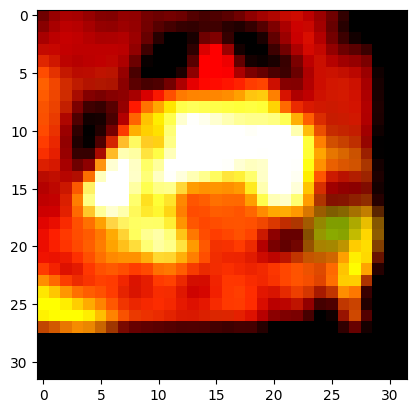

In [25]:
plt.imshow(s)

In [26]:
temp_d = np.transpose(temp, [1, 2, 0])

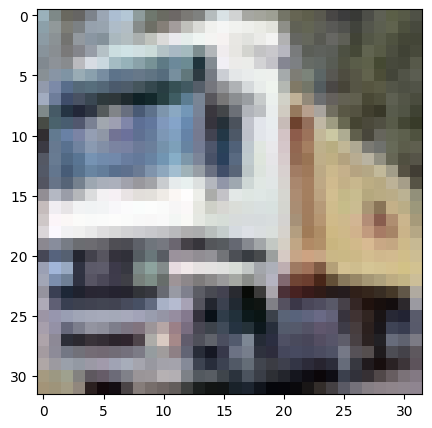

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(temp_d)

In [19]:
y_train

array([6, 9, 9, ..., 9, 1, 1])

In [33]:
#import Network

SyntaxError: invalid syntax (Network.py, line 96)

In [12]:
import Network

In [1]:
from importlib import reload
#reload(Network)

In [38]:
class Configs():
    def __init__(self):
        self.classes = 10
        self.block_size = 3

In [39]:
configs = Configs()

In [41]:
configs.block_size

3

In [14]:
model = Network.MyNetwork(3, 10, 16)

In [15]:
model.cuda()

MyNetwork(
  (stack_layers): ModuleList(
    (0): stack_layer(
      (stack_layers): ModuleList(
        (0): NFNet_Block(
          (projection_shortcut): Conv2d_modified(16, 64, kernel_size=(1, 1), stride=(1, 1))
          (block_seq): Sequential(
            (0): Conv2d_modified(16, 16, kernel_size=(1, 1), stride=(1, 1))
            (1): ReLU()
            (2): Conv2d_modified(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): ReLU()
            (4): Conv2d_modified(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (5): ReLU()
            (6): Conv2d_modified(16, 64, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (1): NFNet_Block(
          (block_seq): Sequential(
            (0): Conv2d_modified(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (1): ReLU()
            (2): Conv2d_modified(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): ReLU()
            (4): Conv2d_modified(16, 16, ke

In [16]:
from torchsummary import summary

In [17]:
summary

<function torchsummary.torchsummary.summary(model, input_size, batch_size=-1, device='cuda')>

In [18]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   Conv2d_modified-1           [-1, 16, 32, 32]             448
   Conv2d_modified-2           [-1, 16, 32, 32]             272
              ReLU-3           [-1, 16, 32, 32]               0
   Conv2d_modified-4           [-1, 16, 32, 32]           2,320
              ReLU-5           [-1, 16, 32, 32]               0
   Conv2d_modified-6           [-1, 16, 32, 32]           2,320
              ReLU-7           [-1, 16, 32, 32]               0
   Conv2d_modified-8           [-1, 64, 32, 32]           1,088
   Conv2d_modified-9           [-1, 64, 32, 32]           1,088
      NFNet_Block-10           [-1, 64, 32, 32]               0
  Conv2d_modified-11           [-1, 16, 32, 32]           1,040
             ReLU-12           [-1, 16, 32, 32]               0
  Conv2d_modified-13           [-1, 16, 32, 32]           2,320
             ReLU-14           [-1, 16,

In [60]:
#Network.Conv2d_modified(3, 4, 2).weight

In [19]:
## test driving the training part

In [10]:
from importlib import reload

In [2]:
import DataLoader
reload(DataLoader)

<module 'DataLoader' from 'C:\\Users\\phdsa\\Documents\\deep\\CSCE636-project-2022 (1)\\starter_code\\DataLoader.py'>

In [26]:
from DataLoader import load_data, train_valid_split

In [27]:
data_dir = '../../cifar-10-python.tar/cifar-10-batches-py/'

In [28]:
x_train, y_train, x_test, y_test = load_data(data_dir)
x_train_new, y_train_new, x_valid, y_valid = train_valid_split(x_train, y_train)

In [29]:
x_test.shape

(10000, 3072)

In [53]:
from Model import MyModel

In [64]:
del MyModel

In [52]:
import Model
reload(Model)

<module 'Model' from 'C:\\Users\\phdsa\\Documents\\deep\\CSCE636-project-2022 (1)\\starter_code\\Model.py'>

In [51]:
import Network
reload(Network)

<module 'Network' from 'C:\\Users\\phdsa\\Documents\\deep\\CSCE636-project-2022 (1)\\starter_code\\Network.py'>

In [35]:
#?MyModel
import torch

In [63]:
class Configs():
    def __init__(self):
        self.classes = 10
        self.block_size = 3
        self.first_num_filters = 16
        self.weight_decay = 2e-4
        self.batch_size = 32
        self.lr = 0.01
        self.save_interval = 1
        self.save_dir = '../saved_models/'

In [14]:
x_train_new.shape, x_valid.shape

((40000, 3072), (10000, 3072))

In [65]:
config = Configs()

In [36]:
device = torch.device('cpu')

In [66]:
model = MyModel(config)

In [60]:
class train_Configs():
    def __init__(self):
        self.batch_size = 32
        self.learning_rate = 0.01
        self.save_interval = 1
        self.max_epoch = 3

In [61]:
train_epoch = train_Configs()

In [67]:
model.train(x_train_new, y_train_new, train_epoch, x_valid, y_valid)

### Training... ###
Epoch 1 Loss 1.807133 Duration 157.667 seconds.
Checkpoint has been created.
### Evaluate on evaluation set ###


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:06<00:00, 23.32it/s]


Test accuracy: 0.4545
validation accuracy after epoch 1 is 0.4545
Epoch 2 Loss 1.470286 Duration 161.872 seconds.
Checkpoint has been created.
### Evaluate on evaluation set ###


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:07<00:00, 21.63it/s]


Test accuracy: 0.4731
validation accuracy after epoch 2 is 0.4731
Epoch 3 Loss 1.277321 Duration 165.299 seconds.
Checkpoint has been created.
### Evaluate on evaluation set ###


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:06<00:00, 23.14it/s]


Test accuracy: 0.6162
validation accuracy after epoch 3 is 0.6162


In [68]:
a = {'a':1}

In [70]:
a['a']

1

In [123]:
x_valid[:-1,].shape

(9999, 3072)

In [124]:
#device
#writing output
#main script

156.25

In [148]:
model.evaluate(x_valid, y_valid)

### Evaluate on evaluation set ###


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:07<00:00, 21.66it/s]


Test accuracy: 0.8217


0.8217

In [93]:
40000 // 32

1250

In [95]:
40000 % 32

0

In [ ]:
1250

In [53]:
a = (3,4)
if type(a) == tuple:
    print("yes")

yes


In [59]:
import torch
import math

In [55]:
a = torch.randn(4)

In [60]:
a/math.sqrt(2)

tensor([-0.1023, -1.4547,  1.0775, -0.6000])

In [4]:
@gfg_decorator
def f():
    print("yes")

NameError: name 'gfg_decorator' is not defined

In [2]:
dec = decorator_function(f)

NameError: name 'decorator_function' is not defined

In [ ]:
@gfg_decorator
def hello_decorator():
    print("Gfg")

'''Above code is equivalent to -

def hello_decorator():
    print("Gfg")
    
hello_decorator = gfg_decorator(hello_decorator)'''

In [31]:
import foo

In [32]:
foo.var = 9

In [25]:
foo.var

9

In [11]:
reload(foo)

<module 'foo' from 'C:\\Users\\phdsa\\Documents\\deep\\CSCE636-project-2022 (1)\\starter_code\\foo.py'>

In [28]:
import foo

In [29]:
foo.var

9

In [35]:
class I():
    num = 0
    def __init__(self):
        self.num = 0
    def method(self):
        return
    def methodA(self):
        I.num = 0
    def methodB(self):
        I.num = I.num + 1
    def methodC(self):
        self.num += 1
    def methodD(cls):
        I.num = I.num + 1
    methodD = classmethod(methodD)
    def methodE(cls):
        return I.num
    methodE = classmethod(methodE)
    def methodF():
        return I.num
    methodF = staticmethod(methodF)
    def methodG(self):
        self.num += 1
    def methodH(self):
        self.num = I.num
        return self.num

In [38]:
K = I()

In [43]:
K.methodG()

In [44]:
K.num

2

In [ ]:
im

In [55]:
pat = "\\\\"

In [46]:
u = "this is \ the match"

In [56]:
u.split(pat)

['this is \\ the match']

In [ ]:
re.match(pat, u)

In [ ]:
class foo:
    def __init__(self)

In [60]:
class Example():
    def example(self):
        return self.test()
    def test(self):
        return "example"
class Test(Example):
    def test(self):
        return "Tes"

In [61]:
example_1 = Example()
example_2 = Test()

In [64]:
print(Example().test(), Test().test())

example Tes


In [65]:
def f():
    yield True

In [66]:
g = f()

In [69]:
h = next(g)

In [70]:
h

True

In [71]:
h = next(g)

StopIteration: 

In [76]:
l = [0, 1, 2, 3, 4, 5, 6]
def f1(x):
    return x * 2
def f2(x):
    if x%2==0:
        return True

In [78]:
[f1(x) for x in l if f2(x)]

[0, 4, 8, 12]

In [80]:
import functools
functools.reduce(f1, list(filter(f2, l)))

TypeError: f1() takes 1 positional argument but 2 were given

In [81]:
list(map(f1, functools.reduce(f2, l)))

TypeError: f2() takes 1 positional argument but 2 were given

In [82]:
list(map(f1, list(filter(f2, l))))

[0, 4, 8, 12]

In [83]:
[functools.reduce(f1, list(filter(f2, l)))]

TypeError: f1() takes 1 positional argument but 2 were given

In [84]:
list(map(f1(x), list(filter(f2(x), l))))

NameError: name 'x' is not defined

In [85]:
def print_result(num):
    if num > 60:
        print("positive")
    else:
        print("begative")
def print_points(num):
    print("points: {}".format(num * 10))
    

In [86]:
import threading

In [89]:
t1 = threading.Thread(target=print_result, args =(70,))
t2 = threading.Thread(target=print_points, args=(8.5,))


In [90]:
print("start")
t1.start()
t2.start()
print("running")
t1.join()
t2.join()
print("end")

start
positive
points: 85.0
running
end


In [100]:
#[1] + [2, 3]
d = {}
try:
    d[1]
except KeyError, vari:
    print(vari)

SyntaxError: invalid syntax (3541310050.py, line 5)

In [102]:
try:
    # stuff
except Exception, e:
    return 'exception %s' % type(e)

IndentationError: expected an indented block (1788886776.py, line 3)

In [103]:
n = 12
names = [[]]*n
employee = 'Adam'
names[6].append(employee)

In [105]:
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            break
    else:
        print(n)

2
3
5
7


In [106]:
def foo(n):
    var1, var2 = 0, 1
    while var1 < n:
        print(var1, end=" ")
        var1, var2 = var2, var1 + var2
    print()

In [107]:
def bar(n):
    result = []
    var1, var2 = 0, 1
    while var1 < n:
        result.append(var1)
        var1, var2 = var2, var1 + var2
    return result

In [109]:
import Model

In [112]:
Model.__name__

'Model'

In [114]:
foo(1000)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 


In [116]:
class foo:
    def __init__(self):
        self.__bar = 123
    def printBar(self):
        print(self.__bar)

In [118]:
from regex import re

ModuleNotFoundError: No module named 'regex'

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
c = {10: [0.7670670039653779, 0.7503], 20: [0.5315202480554581, 0.8163], 30: [0.417052907705307, 0.8366], 40: [0.34947053623199464, 0.8426], 50: [0.21037972316741943, 0.8845], 60: [0.12308746440708637, 0.8922], 70: [0.10112040436416865, 0.8946], 80: [0.08814770403578877, 0.8944], 90: [0.07764131800457835, 0.893], 100: [0.0674239999704063, 0.8964], 110: [0.057704628862440585, 0.8975], 120: [0.05664916457422078, 0.8979], 130: [0.0593867221981287, 0.8961], 140: [0.05420300501994789, 0.8971], 150: [0.05117503041960299, 0.8969], 160: [0.05425011232979596, 0.8962], 170: [0.053400037051737306, 0.8971], 180: [0.0495947775375098, 0.897], 190: [0.0526569432024844, 0.8966], 200: [0.05066709087714553, 0.8978]}


In [22]:
x = [k for k in c.keys()]
y = [round(c[k][0], 4) for k in x]

In [7]:
y

[0.7671,
 0.5315,
 0.4171,
 0.3495,
 0.2104,
 0.1231,
 0.1011,
 0.0881,
 0.0776,
 0.0674,
 0.0577,
 0.0566,
 0.0594,
 0.0542,
 0.0512,
 0.0543,
 0.0534,
 0.0496,
 0.0527,
 0.0507]

Text(0, 0.5, 'Training Loss')

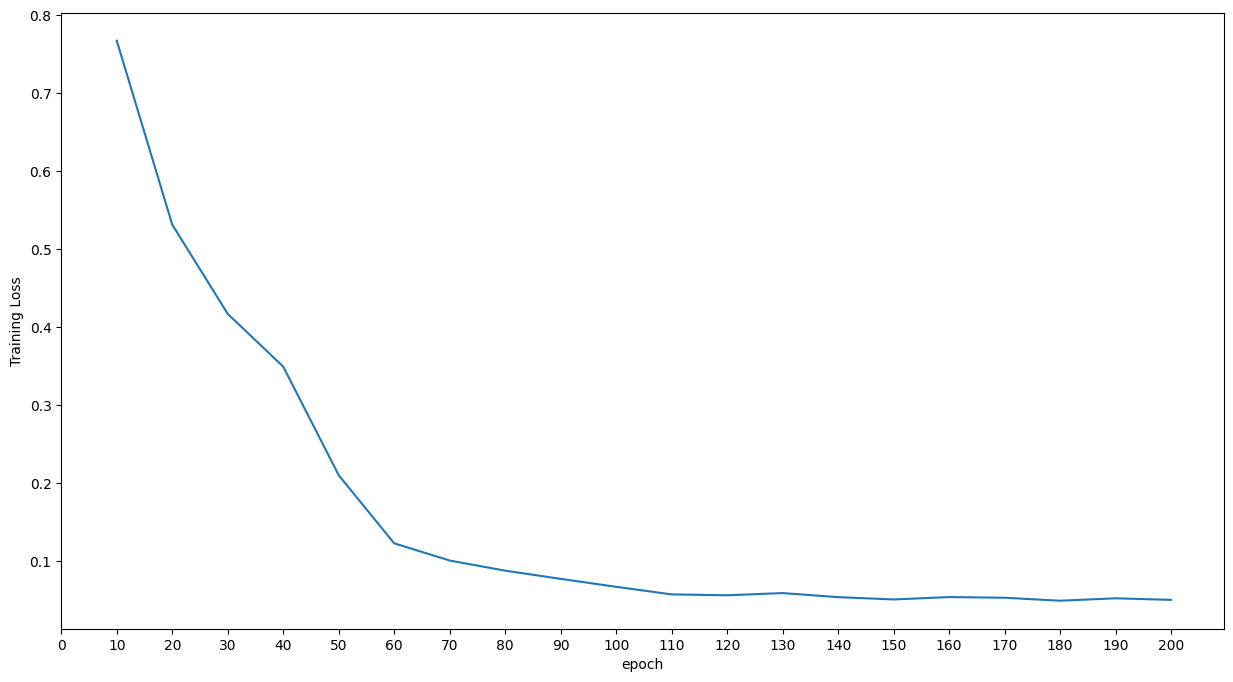

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.xticks(range(0, 210, 10))
plt.xlabel("epoch")
plt.ylabel("Training Loss")

In [24]:
x = [k for k in c.keys()]
y = [100*round(c[k][1], 4) for k in x]

Text(0, 0.5, 'Validation Accuracy (%)')

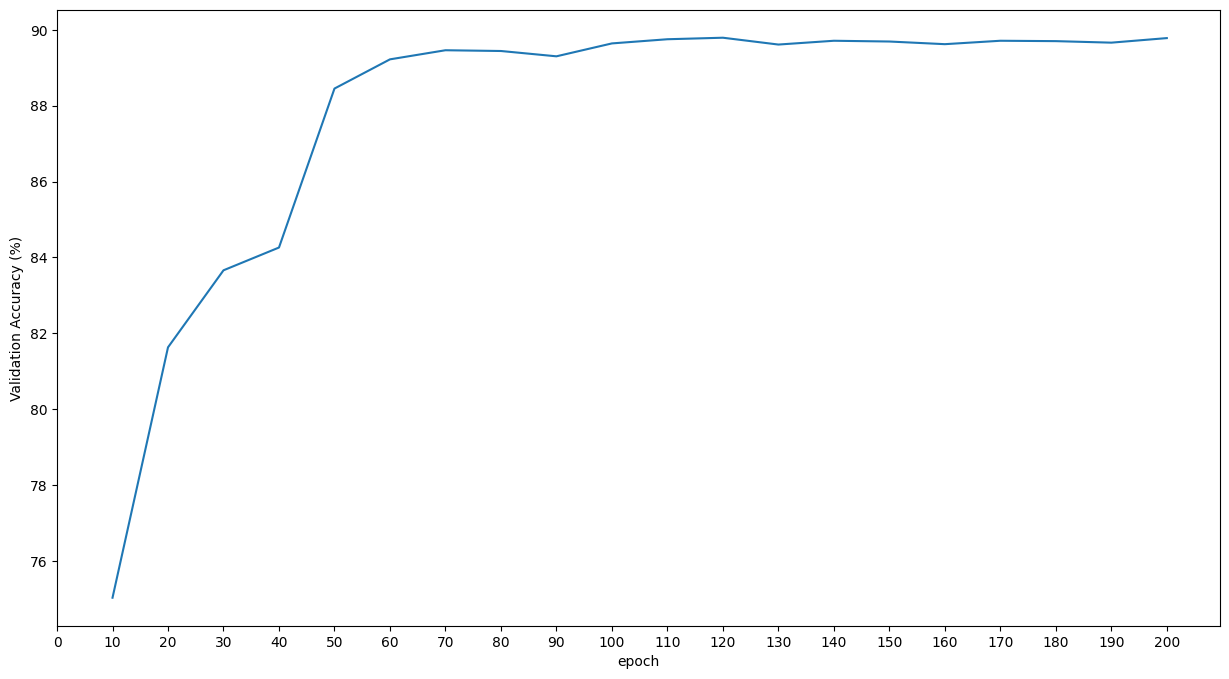

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.xticks(range(0, 210, 10))
plt.xlabel("epoch")
plt.ylabel("Validation Accuracy (%)")